In [1]:
%matplotlib inline
from scipy.stats import rv_continuous
import numpy as np
from numpy import exp, sqrt
from scipy.integrate import quad
import matplotlib.pyplot as plt
import capLib as ca
import fdulib as vdf
import sys
plt.ion()
plt.close('all')

In [16]:
from capLib import *
print sun[0]
def caprate_GOU(u, m , rms='s'):
    """
    this is the gould expression
    input
    u = velocity
    m = WIMP mass
    u_e = escape velocity from the sun
    v_r = dispertion velocity
    """
    if rms == 's':
            v_r = ca.v_shm
    elif rms == 'l':
            v_r = v_lin
    elif rms == 'm':
            v_r = v_mao
    else:
            print "errror!!!!!!", rms
    u_e = v_esc #+ v_Sun### check
    nuc = sun[0]
    # information from the nucleus
    g = float(nuc[3])
    m_i = float(nuc[2])
    print i
    ru =(m_i * m)/(m_i + m)  # WIMP nucleous reduced mass
    ru_p = (m_p * m)/(m_p + m)  # WIMP proton reduced mass
    # SI 0-momentum transfer cross section (CHOI)
    sigma_i = (sigma_sd * (nuc[0]**2) * ru) / ru_p
    # mu factor eq 2.10 GOULD 87
    mu = m_i / m
    mu_p = (mu + 1.) / 2.
    mu_m = (mu - 1.) / 2.
    x = u / v_r
    # factor A^2 eq 2.22 GOULD 87
    # 21 is a empiric number might be wrong
    k2 =(21**2) * g * (mu / (mu_m**2))
    # original form is
    # k2 =(3./2.) * ((u_e**2) / (v_r**2)) * (mu / (mu_m**2))
    # small a factor and small b factor eq A7 GOULD 87

    a = 1e13 * (2./9.) * m * m_i * ((v_r * r_h)**2)
    b = (mu * a) / (mu_p**2)
    # final expression eq A6 GOULD 87
    # constant term
    const = 1e36 * (rho * sigma_i) / (m * b)
    # u dependent terms
    c_1 = exp(-a * m * (x**2))
    c_2_1 = exp(-k2 * (a-b)) # aA2 depends on u
    c_2_2 = exp(-b * m * (x**2))
    # --flag--
    # print "a =", a, " k =",k2, "m =", m, " m_p =", m_p," const", const
    return const * (c_1 - (c_2_1 * c_2_2))
 

['1.0' '0.7392' '0.938789017308' '3.15' 'H']


Solar velocity arround GC     v_Sun =  220.0  km / s
Wimp density                    rho =  267.0  GeV / km^3 
Wimp-nucleon cross section    sigma =  0.333846944016 km^2 SD Wimp-proton    
ffrom Ellis,Olive and Savage (2008) 
 proton mass                    m_p =  2.19e-06  GeV for SD is Hydorgen mass
Nuclear radius(depends on m_i)  r_i =  1.2e-13  ^km for hydrogen
Escape velocity               u_esc =  544.0 km / s
Dispertion velocity             v_0 =  27010000.0 km /s
0


TypeError: unsupported operand type(s) for ** or pow(): 'numpy.string_' and 'int'

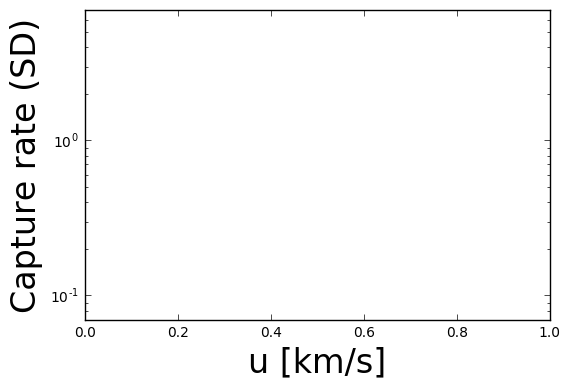

In [17]:
ca.get_variables() # prints variables in use (check captureLib)
### Plot parameters ###
fig ,ax = plt.subplots()
ax.set_yscale('log')
ax.set_ylim([0.07,7])
ax.set_xlabel('u [km/s]',fontsize=24)
ax.set_ylabel('Capture rate (SD)',fontsize=24)
colors = ('r-','r--', 'g-','g--', 'b-','b--', 'm-','m--', )
########################
normal=ca.normalize_max
arrays=8 * [[]]
x_array = np.arange(1,800.,0.1,dtype=np.float64)
particle_physics = np.vectorize(caprate_GOU)
masses = (5, 10, 50, 100, 200, 500, 1000, 10000)
i=-1
for m,c in zip(masses,colors):
            i +=1
            arrays[i]=particle_physics(x_array,float(m))
            title = str(m)+' GeV'
            ax.plot(x_array, normal(arrays[i]),c, label=title,linewidth=2.0)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
legend = ax.legend(loc='upper right', ncol=3, shadow=False, fontsize=20)
frame = legend.get_frame()
fig.set_size_inches(10, 5)

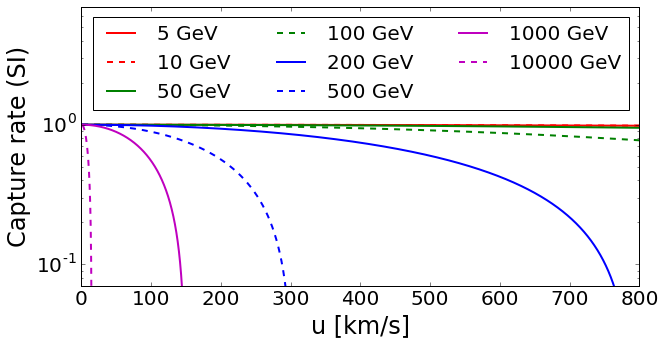

In [6]:
### Plot parameters ###
fig ,ax = plt.subplots()
ax.set_yscale('log')
ax.set_ylim([0.07,7])
ax.set_xlabel('u [km/s]',fontsize=24)
ax.set_ylabel('Capture rate (SI)',fontsize=24)
colors = ('r-','r--', 'g-','g--', 'b-','b--', 'm-','m--', )
########################
normal=ca.normalize_max
arrays=8 * [[0 for l in x_array]]
x_array = [i for i in np.arange(1,800.,0.1)]
particle_physics = np.vectorize(ca.caprate_GOUSI)
masses = (5, 10, 50, 100, 200, 500, 1000, 10000)
i=-1
sun = ca.get_Sun()
for m,c in zip(masses,colors):
            i +=1
            for j in range(0,len(sun)):
                arrays[i]+=particle_physics(x_array,m,j)
            title = str(m)+' GeV'
            ax.plot(x_array, normal(arrays[i]),c, label=title,linewidth=2.0)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
legend = ax.legend(loc='upper right', ncol=3, shadow=False, fontsize=20)
frame = legend.get_frame()
fig.set_size_inches(10, 5)

In [4]:
arrays=8 * [[0 for l in x_array]]
print len(arrays[0])

7990
